<a href="https://colab.research.google.com/github/deepu-san/Projects/blob/main/Loan%20Prediction/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('https://raw.githubusercontent.com/deepu-san/Projects/main/Loan%20Prediction/train.csv')
df=train.copy()

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Graphs

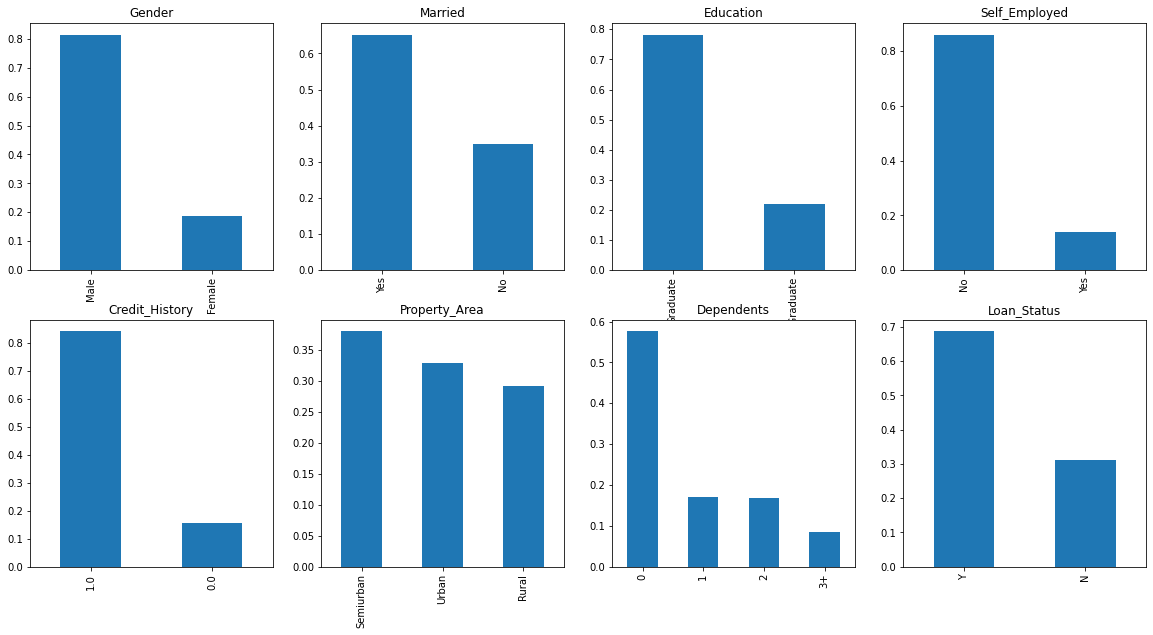

In [6]:
#plt.figure(1) 
plt.subplot(241)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(242)
df['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(243)
df['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')

plt.subplot(244)
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(245)
df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

plt.subplot(246)
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Property_Area')

plt.subplot(247)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')

plt.subplot(248)
df['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Loan_Status')




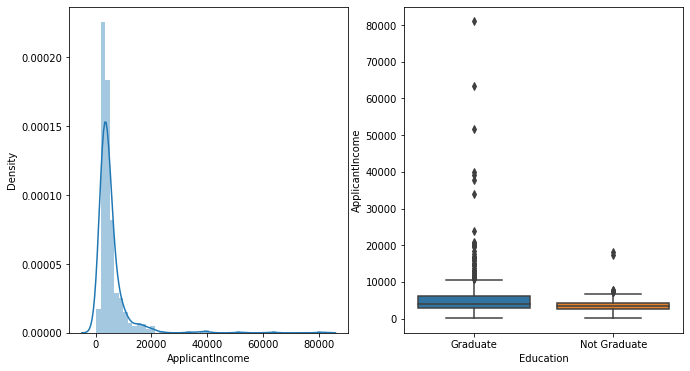

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(11,6))

sns.distplot(df['ApplicantIncome'],ax=axes[0])
sns.boxplot(x="Education", y="ApplicantIncome", data=df,ax=axes[1])

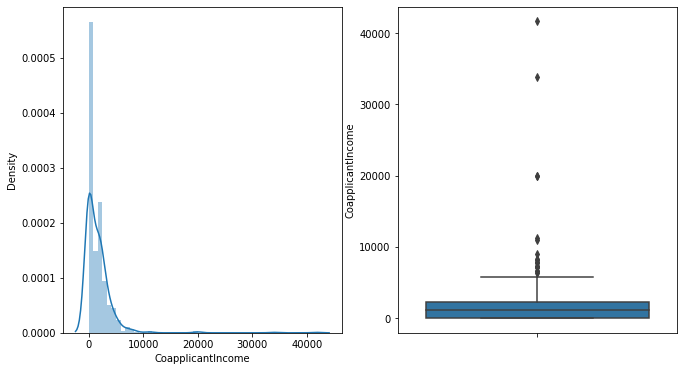

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(11,6))

sns.distplot(df['CoapplicantIncome'],ax=axes[0])
sns.boxplot(y="CoapplicantIncome", data=df,ax=axes[1])

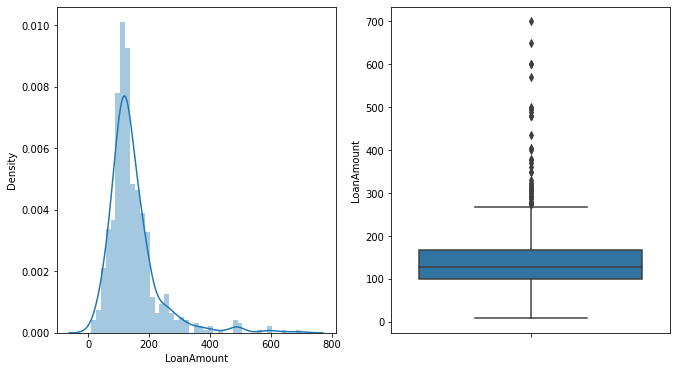

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(11,6))

sns.distplot(df['LoanAmount'],ax=axes[0])
sns.boxplot(y="LoanAmount", data=df,ax=axes[1])

# Pre Processing


In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [12]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [13]:
df['LoanAmount']=np.log(df['LoanAmount'])

df["Married"] = df["Married"].replace({"No" : 0,"Yes":1})
df["Gender"] = df["Gender"].replace({"Male" : 0,"Female":1})
df["Education"] = df["Education"].replace({"Not Graduate" : 0,"Graduate":1})
df["Self_Employed"] = df["Self_Employed"].replace({"No" : 0,"Yes":1})

df["Dependents"] = df["Dependents"].replace({"0" : 0,"1":1,"2":2,"3+":3})

df["Loan_Status"] = df["Loan_Status"].replace({"N" : 0,"Y":1})

df.drop('Loan_ID',axis=1,inplace=True)


In [14]:
df = pd.get_dummies(df)

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [16]:
target='Loan_Status'
X=df.drop(target,axis=1)
y=df[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [31]:
#Logistic Regression

model= LogisticRegression() 
model.fit(X_train,y_train) 
y_pred=model.predict(X_test)

In [28]:
#Decision Tree

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [40]:
params =     {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03]}


model = xgb.XGBClassifier(n_estimators=100)
model_gs = GridSearchCV(model,param_grid=params,cv=10,scoring="roc_auc")
model_gs.fit(X_train,y_train)


print("The best parameters across ALL searched params:\n",model_gs.best_params_)
print("\n The best score across ALL searched params:\n",model_gs.best_score_)


The best parameters across ALL searched params:
 {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5}

 The best score across ALL searched params:
 0.7602392681210415


In [32]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 22  29]
 [  4 130]]
The model accuracy is 0.8216216216216217


In [33]:
#roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
roc_auc_score(y_test, model.predict_proba(X_test)[:,1],multi_class='ovr')


0.7775826748609891